# Exercise Session 4 – MFA in matrix form
### ENV–501 Material and Energy Flow Analysis

October 20th, 2022

Exercises readapted for Jupyter Notebook by Matteo Barsanti

* Exercise 1: Wood management in Switzerland (MFA in matrix form)
* Exercise 2: Cadmium metabolism in an agricultural enterprise (exam-like MFA)
* Exercise 3: Metabolism of a gravel pit (exam-like MFA)

## Exercise 1: Wood management in Switzerland

This exercise investigates the use of wood for construction and energy purposes. Two types of wood are harvested in Switzerland: logs for lumber and wood for energy. The first one is used in buildings whereas the second is for space heating. Roundwood logs are transported to sawmills in order to be transformed into construction materials. 
The wastes generated by sawmills are recycled, as well as the secondary wood materials collected in buildings during demolition. The recycling process produces additional wood for heating. The system boundaries do not include the stock accumulating in buildings, therefore it will be considered as an output. In 2010, a total of 5’500’000 m3 of wood were harvested and two scenarios should be considered, (a) 30% of the harvest is used for heating, (b) 70% of the harvest is used for heating. In both scenarios, the remaining fraction of wood harvested is used for construction materials.

<ins>Available data:</ins>

The transfer coefficients are the following:

| | Sawmill | Recycling | Heating | Construction | Outputs |
| --- | :-: | :-: | :-: | :-: | :-: |
| Sawmill |  | 0.4 |  | 0.6 |  |
| Recycling |  |  | 1 |  |  |
| Heating |  |  |  |  | 1 |
| Construction |  | 0.5 |  |  | 0.5 |
| Roundwood harvest (input) | 1 |  |  |  |  |
| Energy wood harvest (input) |  |  | 1 |  |  |

<ins>Questions:</ins>
1. Draw the flow diagram of the system for wood management in Switzerland in 2010 using the above description. Calculate the output quantities for the two scenarios.
2. This question has two parts to evaluate the impact of the energy transition, which essentially has two objectives: decarbonizing energy consumption by promoting the use of renewables and increasing energy efficiency in buildings (as well as in industry and transportation).
    1. If the energy demand for heating from wood combustion increased by 20%, what would be the impact on outputs for both scenarios?
    2. The demolition rate increases to allow the construction of energy efficient buildings. What if the transfer coefficient to recycling increases to 0.7 instead of 0.5? What would be the outputs then?

In [1]:
# -- Import the required libraries
import numpy as np
import pandas as pd
from IPython.display import Image

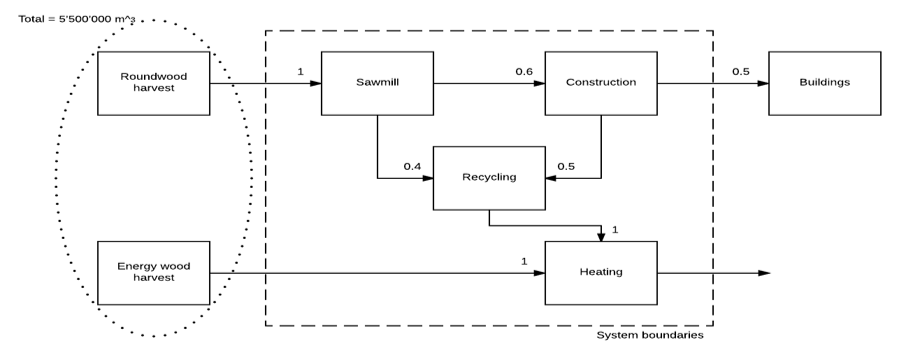

In [2]:
# -- Display the flow diagram
Image(filename='ex1_flowdiagram.png') 

#### EX1.1 
*Calculate the output quantities for the two scenarios.* 

In [3]:
# -- Problem parameters

# total inputs in [m3]
tot_input = 5500000 

# matrix of transfer coefficients
Kt = np.array([[0, 0.4,   0, 0.6,   0], 
               [0,   0,   1,   0,   0], 
               [0,   0,   0,   0,   1], 
               [0, 0.5,   0,   0, 0.5],
               [1,   0,   0,   0,   0], 
               [0,   0,   1,   0,   0]])
Kt_df = pd.DataFrame(Kt,
                     index   = ['Sawmill', 'Recycling', 'Heating', 'Construction','round-wood harvest','energy-wood harvest'],
                     columns = ['Sawmill', 'Recycling', 'Heating', 'Construction', 'Outputs'])

# matrix of scenarios
S = np.array([[0.7, 0.3],
              [0.3, 0.7]])
S_df = pd.DataFrame(S,
                    index   = ['scenario1', 'scenario2'],
                    columns = ['round-wood harvest','energy-wood harvest'])
Kt_df

,Sawmill,Recycling,Heating,Construction,Outputs
Sawmill,0.0,0.4,0.0,0.6,0.0
Recycling,0.0,0.0,1.0,0.0,0.0
Heating,0.0,0.0,0.0,0.0,1.0
Construction,0.0,0.5,0.0,0.0,0.5
round-wood harvest,1.0,0.0,0.0,0.0,0.0
energy-wood harvest,0.0,0.0,1.0,0.0,0.0


In [4]:
Kt_df

,Sawmill,Recycling,Heating,Construction,Outputs
Sawmill,0.0,0.4,0.0,0.6,0.0
Recycling,0.0,0.0,1.0,0.0,0.0
Heating,0.0,0.0,0.0,0.0,1.0
Construction,0.0,0.5,0.0,0.0,0.5
round-wood harvest,1.0,0.0,0.0,0.0,0.0
energy-wood harvest,0.0,0.0,1.0,0.0,0.0


In [5]:
# -- Matrix calculations for the two scenarios

# 1. create an Identity matrix with the same dimensions of the transfer coefficient matrix to use in the calculations
A = np.identity(len(Kt[0:4,0:4]))

# 2. transpose the transfer coefficient matrix 
K = Kt[0:4,0:4].transpose()

# 3. calculate the mass imports for each usage based on the two different scenarios
I = np.dot(Kt[4:6,0:4].transpose(), S*tot_input) 
I_df = pd.DataFrame(I,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['scenario1', 'scenario2'])

# 4. calculate the total mass inputs for each usage using (A-K)^(-1)*I 
X = np.dot(np.linalg.inv(A-K), I)
X_df = pd.DataFrame(X,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['scenario1', 'scenario2'])

# 5. calculate the output quantities for the two scenarios
O1 = np.multiply(X[:,0], Kt[0:4,4]) 
O2 = np.multiply(X[:,1], Kt[0:4,4]) 
O1_df = pd.DataFrame(O1,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['outputs S1'])
O2_df = pd.DataFrame(O2,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['outputs S2'])

# 6. show the results
pd.concat([O1_df, O2_df], axis=1)

,outputs S1,outputs S2
Sawmill,0.0,0.0
Recycling,0.0,0.0
Heating,4345000.0,5005000.0
Construction,1155000.0,495000.0


#### EX1.2A 
*If the energy demand for heating from wood combustion increased by 20%, what would be the impact on outputs for both scenarios?*

In [6]:
# -- Problem parameters

# wood demand increase
wd_increase = 1.2 

# updated input matrix
I_a = I.copy()
I_a[2,:] = I_a[2,:] * wd_increase
I_a_df = pd.DataFrame(I_a,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['scenario1', 'scenario2'])

In [7]:
I_a_df.sum()

scenario1    5830000.0
scenario2    6270000.0
dtype: float64

In [8]:
I_df

,scenario1,scenario2
Sawmill,3850000.0,1650000.0
Recycling,0.0,0.0
Heating,1650000.0,3850000.0
Construction,0.0,0.0


In [9]:
I_a_df

,scenario1,scenario2
Sawmill,3850000.0,1650000.0
Recycling,0.0,0.0
Heating,1980000.0,4620000.0
Construction,0.0,0.0


In [10]:
# -- Matrix calculations for the two scenarios

# calculate the new total mass inputs for each usage using (A-K)^(-1)*I 
X_a = np.dot(np.linalg.inv(A-K), I_a)
X_a_df = pd.DataFrame(X_a,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['scenario1', 'scenario2'])

# estimate the relative demand growth 
X_growth = X_a_df.subtract(X_df).div(X_df, axis=0)*100

# show the results
results = pd.concat([X_df, X_a_df, X_growth], axis=1)
results.columns = pd.MultiIndex.from_product([['old demand  [m3]','new demand [m3]','growth [%]'],X_a_df.columns])
results

old demand  [m3]            new demand [m3]             \
                    scenario1  scenario2       scenario1  scenario2   
Sawmill             3850000.0  1650000.0       3850000.0  1650000.0   
Recycling           2695000.0  1155000.0       2695000.0  1155000.0   
Heating             4345000.0  5005000.0       4675000.0  5775000.0   
Construction        2310000.0   990000.0       2310000.0   990000.0   

             growth [%]             
              scenario1  scenario2  
Sawmill        0.000000   0.000000  
Recycling      0.000000   0.000000  
Heating        7.594937  15.384615  
Construction   0.000000   0.000000

#### EX1.2B 
*The demolition rate increases to allow the construction of energy efficient buildings. What if the transfer coefficient to recycling increases to 0.7 instead of 0.5? What would be the outputs then?*

In [11]:
# -- Problem parameters

# wood demand increase
new_k_recycling = 0.7 

# updated transfer coefficnet matrix
Kt_b = Kt.copy()
Kt_b[3,1] = new_k_recycling
Kt_b[3,4] = 1 - new_k_recycling
Kt_b_df = pd.DataFrame(Kt_b,
                     index   = ['Sawmill', 'Recycling', 'Heating', 'Construction','round-wood harvest','energy-wood harvest'],
                     columns = ['Sawmill', 'Recycling', 'Heating', 'Construction', 'Outputs'])

In [12]:
Kt_df

,Sawmill,Recycling,Heating,Construction,Outputs
Sawmill,0.0,0.4,0.0,0.6,0.0
Recycling,0.0,0.0,1.0,0.0,0.0
Heating,0.0,0.0,0.0,0.0,1.0
Construction,0.0,0.5,0.0,0.0,0.5
round-wood harvest,1.0,0.0,0.0,0.0,0.0
energy-wood harvest,0.0,0.0,1.0,0.0,0.0


In [13]:
Kt_b_df

,Sawmill,Recycling,Heating,Construction,Outputs
Sawmill,0.0,0.4,0.0,0.6,0.0
Recycling,0.0,0.0,1.0,0.0,0.0
Heating,0.0,0.0,0.0,0.0,1.0
Construction,0.0,0.7,0.0,0.0,0.3
round-wood harvest,1.0,0.0,0.0,0.0,0.0
energy-wood harvest,0.0,0.0,1.0,0.0,0.0


In [14]:
# -- Matrix calculations for the two scenarios

# 1. transpose the transfer coefficient matrix 
K_b = Kt_b[0:4,0:4].transpose()

# 2. calculate the mass inports for each usage based on the two different scenarios
I_b = np.dot(Kt_b[4:6,0:4].transpose(), S*tot_input) 
I_b_df = pd.DataFrame(I_b,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['scenario1', 'scenario2'])

# 3. calculate the total mass inputs for each usage using (A-K)^(-1)*I 
X_b = np.dot(np.linalg.inv(A-K_b), I_b)
X_b_df = pd.DataFrame(X_b,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['scenario1', 'scenario2'])

# 4. calculate the output quantities for the two scenarios
O1_b = np.multiply(X_b[:,0], Kt_b[0:4,4]) 
O2_b = np.multiply(X_b[:,1], Kt_b[0:4,4]) 
O1_b_df = pd.DataFrame(O1_b,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['outputs S1'])
O2_b_df = pd.DataFrame(O2_b,
                    index   = ['Sawmill', 'Recycling', 'Heating', 'Construction'],
                    columns = ['outputs S2'])

# 5. show the results
pd.concat([O1_b_df, O2_b_df], axis=1)

,outputs S1,outputs S2
Sawmill,0.0,0.0
Recycling,0.0,0.0
Heating,4807000.0,5203000.0
Construction,693000.0,297000.0


## Exercise 2: Cadmium metabolism in an agricultural enterprise 

An agricultural enterprise involves the processes of **cultivation**, which includes the vegetation itself, **livestock production**, and **soil**. To feed the livestock, the farmer uses both **imported** and internal fodder (1 and 15 gCd/y respectively). The products from the livestock (milk and meat) have a cadmium content of 2 gCd/y and are **sold on the local market**. The manure is used to fertilise the crops. The cadmium **fallout from the atmosphere** to the crops represents 30 gCd/y. The farmer also uses **artificial fertiliser** with a cadmium content of 5 gCd/y for the cultivation. We assume that all these cadmium inputs are assimilated by the vegetal cover and the concentration in the harvest is 17 gCd/y. Part of it is sold to the local market (2 gCd/y) and the rest is used as fodder. All the crop by–products decompose on the land to feed the soil. There is some **erosion and run–off happening**, which takes out 2 gCd/y from the soil into the water.

\* within / beyond system boundaries (agricultural enterprise)

1. Draw the system as a quantitative flow chart and calculate the missing flows, as well as the stocks in the system.
2. Calculate the transfer coefficient of the runoff to water for the entire system.
3. Suggest measures to make the system steady state. Calculate the change in the transfer coefficients of a system in steady state compared to the current situation. Discuss the applicability of the suggested measures and identify possible side effects.

## Exercise 3: Metabolism of a gravel pit

Company XYZ operates a gravel pit and performs construction work on-site (building/renovation of buildings). The current gravel stock in the pit is 1’000’000 tonnes. Gravel is extracted from the pit for sale to external clients (fixed amount of 20’000 tonnes every year), and also for the company’s own construction activities on-site. The empty pit is used to store demolition material (inert) received from external construction companies. The demolition material is ground by Company XYZ before storage and half is used for construction. For its own constructions, Company XYZ uses both the grinded demolition material and extracted gravel from the pit (4 to 1 ratio).

The company is interested to know how much demolition material it can use per year in order to maximise the use of empty space in the gravel pit so as to avoid incurring additional costs for an external landfill.


1. Set up a system diagram of the company.
2. Establish the system equations.
3. Solve the equations and quantify the system diagram.
